### Hi All
# Introduction: Machine Learning Project Part 1

In this notebook, we will walk through solving a complete machine learning problem using a real-world dataset and the one sentence summary is:

__Use the provided building energy data to develop a model that can predict a building's Energy Star score

This is a supervised, regression machine learning task: given a set of data with targets (in this case the score) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target. 

* Supervised problem: we are given both the features and the target
* Regression problem: the target is a continous variable, in this case ranging from 0-100

During training, we want the model to learn the relationship between the features and the score so we give it both the features and the answer. Then, to test how well the model has learned, we evaluate it on a testing set where it has never seen the answers! 

## Machine Learning Workflow

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant: 

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Establish a baseline and compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set

Setting up the structure of the pipeline ahead of time lets us see how one step flows into the other. However, the machine learning pipeline is an iterative procedure and so we don't always follow these steps in a linear fashion.  We may revisit a previous step based on results from further down the pipeline. For example, while we may perform feature selection before building any models, we may use the modeling results to go back and select a different set of features. Or, the modeling may turn up unexpected results that mean we want to explore our data from another angle. Generally, you have to complete one step before moving on to the next, but don't feel like once you have finished one step the first time, you cannot go back and make improvements! 

This notebook will cover the first three (and a half) steps of the pipeline with the other parts discussed in two additional notebooks. Throughout this series, the objective is to show how all the different data science practices come together to form a complete project. I try to focus more on the implementations of the methods rather than explaining them at a low-level, but have provided resources for those who want to go deeper. For the single best book (in my opinion) for learning the basics and implementing machine learning practices in Python, check out [Hands-On Machine Learning with Scikit-Learn and Tensorflow](http://shop.oreilly.com/product/0636920052289.do) by [Aurelion Geron](https://twitter.com/aureliengeron?lang=en). 

With this outline in place to guide us, let's get started! 

In [1]:
# For Data Manipulations
import pandas as pd
import numpy as np

# For Visualization 
from matplotlib import pyplot as plt
import seaborn as sns

# To prevent unwanted warnings. it piss me off sometimes so i just do this pretty neat huh!
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read or Load in the data to use
data = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission_49d68Cx.csv')

In [3]:
df = data.copy() # this is done to prevent loading the data again if we do something wrong while manipulating it
df.head() # visualize the first five rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns # to get the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info() # this helps to visualize if we there are missing values and check the types of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [6]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

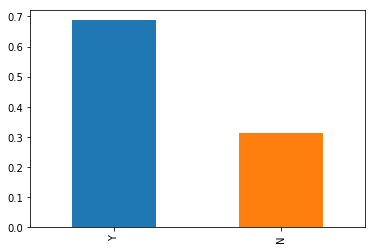

In [8]:
df['Loan_Status'].value_counts(normalize=True).plot(kind='bar')

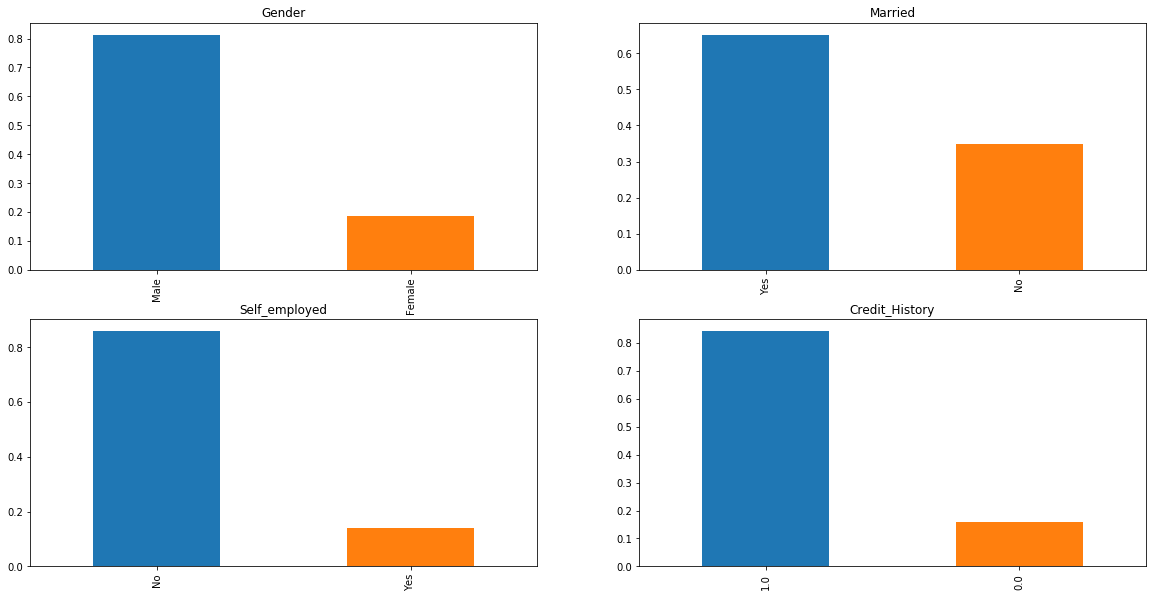

In [9]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar( title='Self_employed')
plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

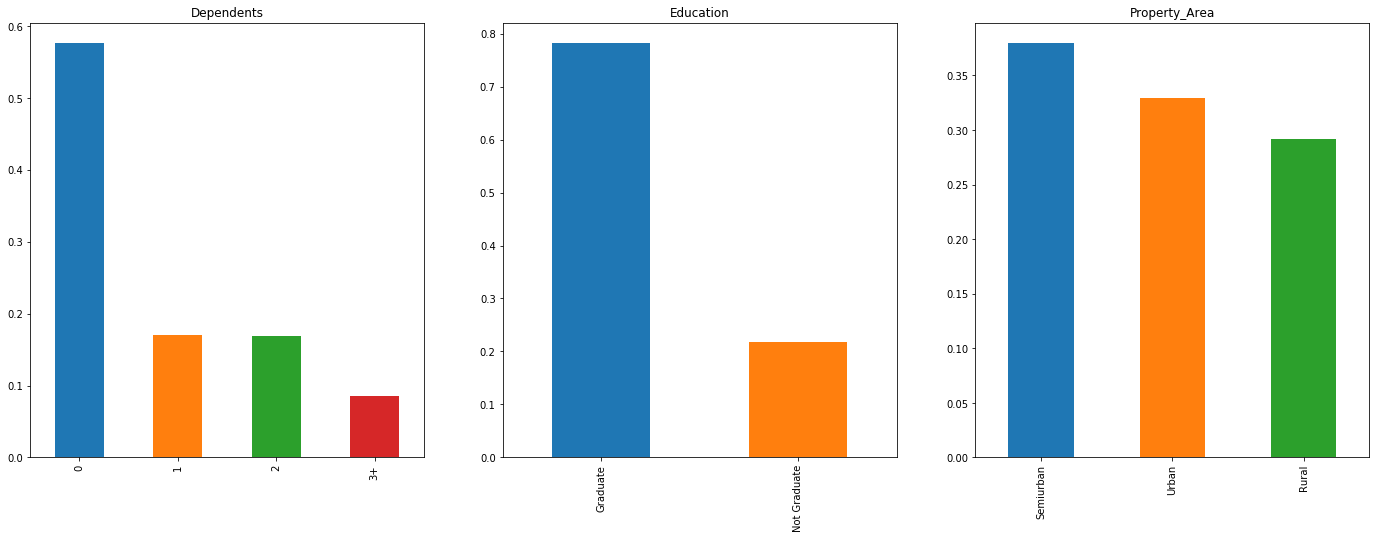

In [10]:
plt.figure(1)
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,8), title='Dependents')

plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')


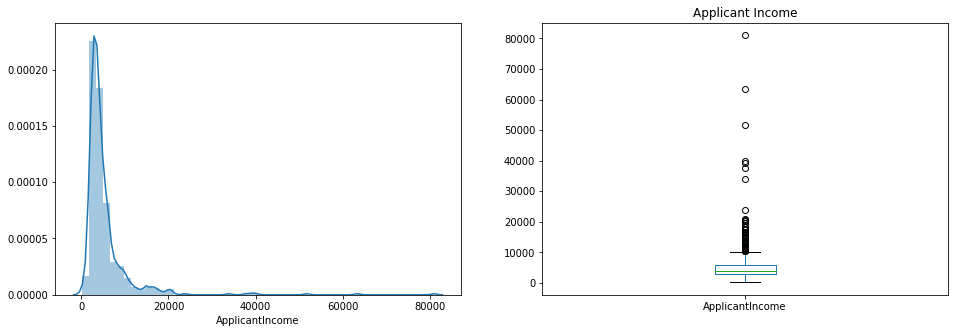

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5), title='Applicant Income')

Text(0.5,0.98,'')

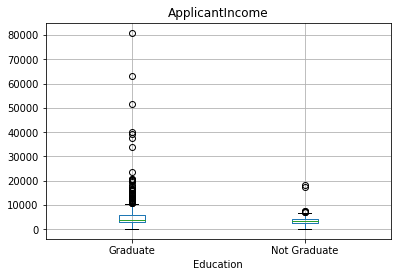

In [12]:
df.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')

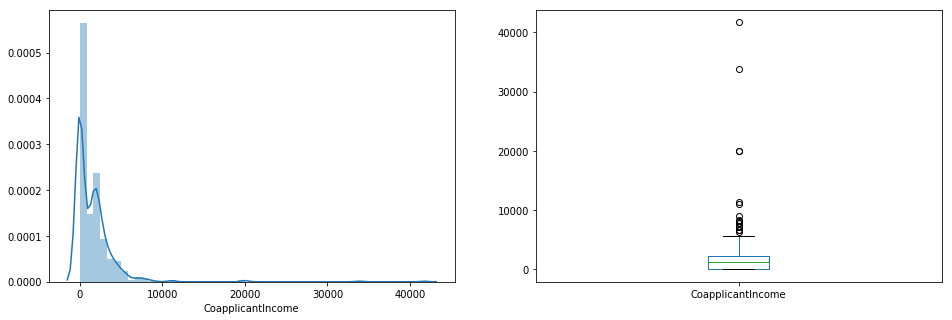

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

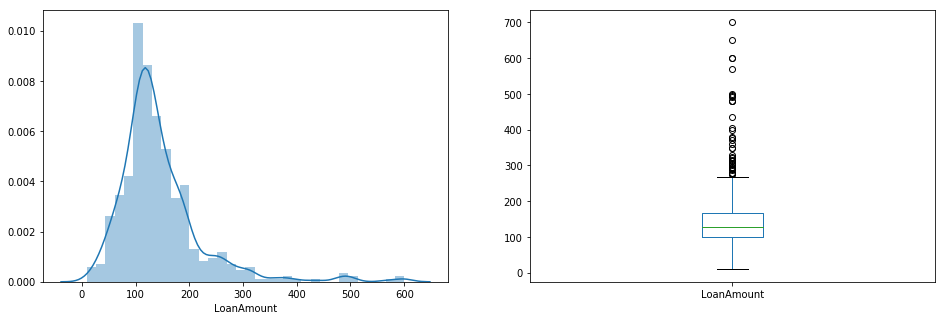

In [14]:
plt.figure(1)
plt.subplot(121)
df1 = df.dropna()
sns.distplot(df1['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

## BiVariate Analysis 

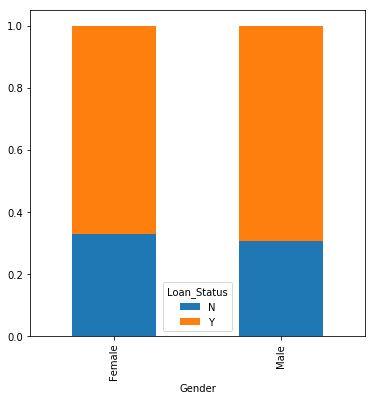

In [15]:
# Categorical Indeoendent Variable Vs Target Variable

gender = pd.crosstab(df['Gender'], df['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,6))

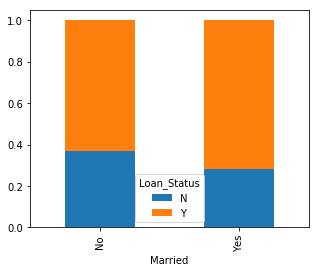

In [16]:
married = pd.crosstab(df['Married'], df['Loan_Status'])
married.div(married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,4))

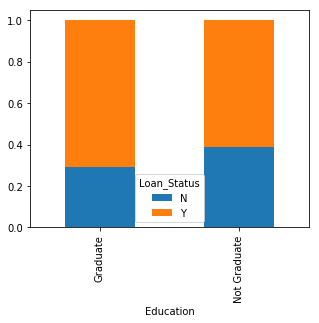

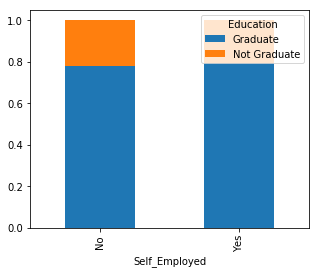

In [17]:
education = pd.crosstab(df['Education'], df['Loan_Status'])
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,4))

self_employed = pd.crosstab(df['Self_Employed'], df['Education'])
self_employed.div(self_employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,4))

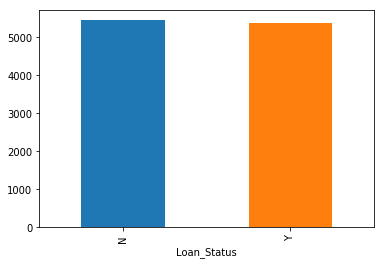

In [18]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0,0.5,'Percentage')

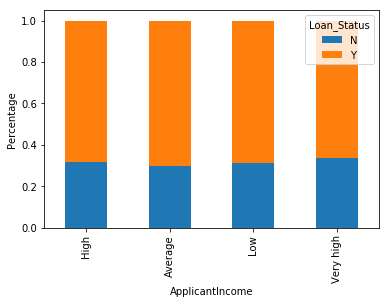

In [19]:
bins=[0, 2500, 4000, 6000, 81000]
group=['Low', 'Average', 'High', 'Very high']

df['Income_bin'] = pd.cut(df['ApplicantIncome'], bins, labels=group)

income_bin = pd.crosstab(df['Income_bin'], df['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0,0.5,'Percentage')

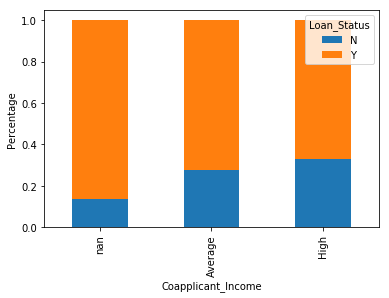

In [20]:
bins = [0, 1000, 3000, 42000]
group=['Low', 'Average', 'High']
df['CoapplicantIncome_bin'] = pd.cut(df['CoapplicantIncome'], bins, labels=group)

coapplicant_income_bin = pd.crosstab(df['CoapplicantIncome_bin'], df['Loan_Status'])
coapplicant_income_bin.div(coapplicant_income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Coapplicant_Income')
plt.ylabel('Percentage')

Text(0,0.5,'Percentage')

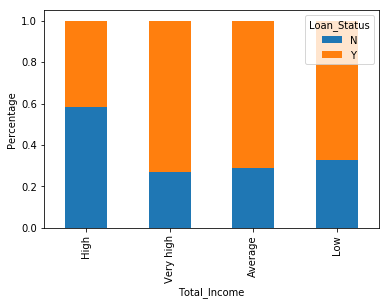

In [21]:
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
df['Total_Income_bin'] = pd.cut(df['Total_Income'], bins, labels=group)

total_income_bin = pd.crosstab(df['Total_Income_bin'], df['Loan_Status'])
total_income_bin.div(total_income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Total_Income')
plt.ylabel('Percentage')

In [22]:
df = df.drop(['Income_bin', 'CoapplicantIncome_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [23]:
df['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

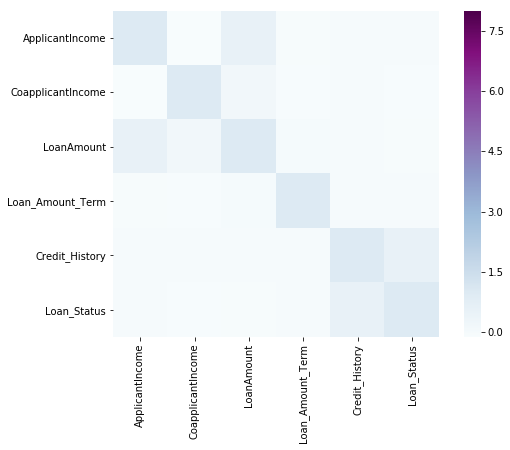

In [24]:
matrix = df.corr()
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=8, square=True, cmap='BuPu')

### Missing Value Imputation 

In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [27]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [29]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
test['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
test['Married'].fillna(df['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

### Outlier Treatment 

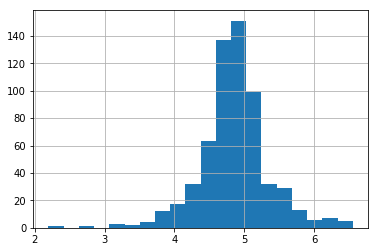

In [31]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(df['LoanAmount'])

In [32]:
# OverSampling
# from sklearn.utils import resample
# df_minority = df[df['Loan_Status'] == 0]
# df_majority = df[df['Loan_Status'] == 1]

# df_minority_upsampled = resample(df_minority,
#                                 random_state=42,
#                                 n_samples=len(df_majority))
# df = pd.concat([df_majority, df_minority_upsampled])

# df['Loan_Status'].value_counts()

### Model Building Part 1 

In [33]:
df.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

In [34]:
X = df.drop('Loan_Status',1)
y = df['Loan_Status']

X = pd.get_dummies(X)
test = pd.get_dummies(test)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=.2)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred_cv = model.predict(X_cv)
metrics.accuracy_score(y_cv, pred_cv)

0.8130081300813008

In [38]:
pred_test = model.predict(test)
sample['Loan_Status'] = pred_test

In [39]:
sample['Loan_Status'].replace(0, 'N', inplace=True)
sample['Loan_Status'].replace(1, 'Y', inplace=True)

In [40]:
pd.DataFrame(sample, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

### Regression Using Stratified k-folds cross validation 

In [41]:
from sklearn.model_selection import StratifiedKFold

i = 1
kf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for df_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[df_index], X.loc[test_index]
    ytr, yvl = y[df_index], y[test_index]
    model = LogisticRegression(random_state=21)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = metrics.accuracy_score(pred_test, yvl)
    print('Accuracy Score', score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score 0.7661290322580645

2 of kfold 5
Accuracy Score 0.7741935483870968

3 of kfold 5
Accuracy Score 0.8524590163934426

4 of kfold 5
Accuracy Score 0.8032786885245902

5 of kfold 5
Accuracy Score 0.860655737704918


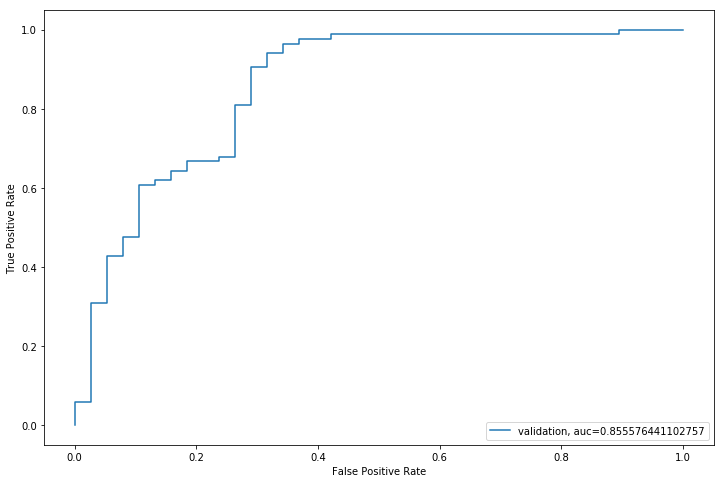

In [42]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

In [43]:
sample['Loan_Status'] = pred_test

sample['Loan_Status'].replace(0, 'N', inplace=True)
sample['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(sample, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic_Kfold.csv')

### Feature Engineering 

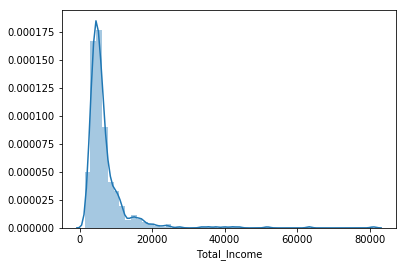

In [44]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Check the distribution of Total_Income
sns.distplot(df['Total_Income'])

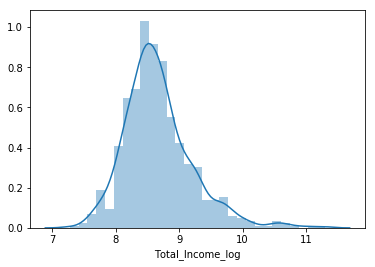

In [45]:
# Since it is right skewed we take the log to make it normal
df['Total_Income_log'] = np.log(df['Total_Income'])

sns.distplot(df['Total_Income_log'])

test['Total_Income_log'] = np.log(test['Total_Income'])

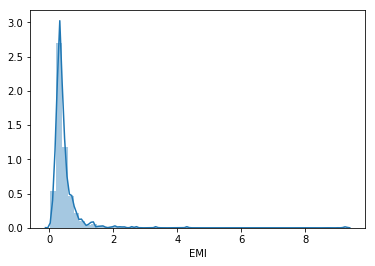

In [46]:
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

sns.distplot(df['EMI'])

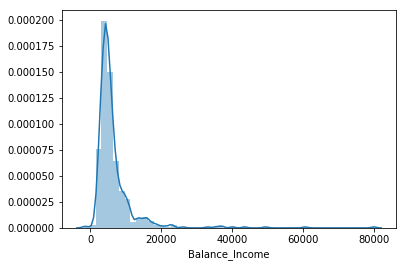

In [47]:
df['Balance_Income'] = df['Total_Income'] - (df['EMI']*1000)
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)

sns.distplot(df['Balance_Income'])

In [48]:
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], 1)

### Model Building Part2  

In [49]:
X = df.drop('Loan_Status',1)
y = df.Loan_Status

X = pd.get_dummies(X)

In [50]:
# Logistic Regression

i = 1
kf = StratifiedKFold(n_splits=5, random_state=44, shuffle=True)
for df_index, test_index in kf.split(X,y):
    print("\n{} of kfolds {}".format(1, kf.n_splits))
    xtr, xvl = X.loc[df_index], X.loc[test_index]
    ytr, yvl = y[df_index], y[test_index]
    model = LogisticRegression(random_state=22)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = metrics.accuracy_score(yvl, pred_test)
    print('Accuracy Score', score)
    i+=1
    pred = model.predict_proba(xvl)[:,1]


1 of kfolds 5
Accuracy Score 0.8145161290322581

1 of kfolds 5
Accuracy Score 0.8145161290322581

1 of kfolds 5
Accuracy Score 0.8032786885245902

1 of kfolds 5
Accuracy Score 0.7704918032786885

1 of kfolds 5
Accuracy Score 0.8114754098360656


In [51]:
# Decision Tree

from sklearn import tree
i = 1
kf = StratifiedKFold(n_splits=5, random_state=2, shuffle=True)
for df_index, test_index in kf.split(X,y):
    print('\n{} of kfolds {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[df_index], X.loc[test_index]
    ytr, yvl = y[df_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = metrics.accuracy_score(yvl, pred_test)
    print('Accuracy Score', score)
    i+=1
    pred = model.predict_proba(xvl)[:,1]


1 of kfolds 5
Accuracy Score 0.6532258064516129

2 of kfolds 5
Accuracy Score 0.717741935483871

3 of kfolds 5
Accuracy Score 0.7377049180327869

4 of kfolds 5
Accuracy Score 0.7131147540983607

5 of kfolds 5
Accuracy Score 0.7295081967213115


In [52]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
i= 1
kf = StratifiedKFold(n_splits=5, random_state=21, shuffle=True)
for df_index, test_index in kf.split(X,y):
    print("\n{} of kfolds {}".format(i, kf.n_splits))
    xtr, xvl = X.loc[df_index], X.loc[test_index]
    ytr, yvl = y[df_index], y[test_index]
    model = RandomForestClassifier()
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = metrics.accuracy_score(yvl, pred_test)
    print('Accuarcy Score', score)
    i+=1


1 of kfolds 5
Accuarcy Score 0.7580645161290323

2 of kfolds 5
Accuarcy Score 0.7419354838709677

3 of kfolds 5
Accuarcy Score 0.6885245901639344

4 of kfolds 5
Accuarcy Score 0.7950819672131147

5 of kfolds 5
Accuarcy Score 0.7868852459016393


In [53]:
# Using Grid Search
from sklearn.model_selection import GridSearchCV

param = {'max_depth': list(range(1,30,2)), 'n_estimators':list(range(1,300,20))}

grid_serch = GridSearchCV(RandomForestClassifier(random_state=41), param)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=12)

grid_serch.fit(X_train, y_train)

C:\Users\A.A.O\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=41,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [54]:
grid_serch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=221,
                       n_jobs=None, oob_score=False, random_state=41, verbose=0,
                       warm_start=False)

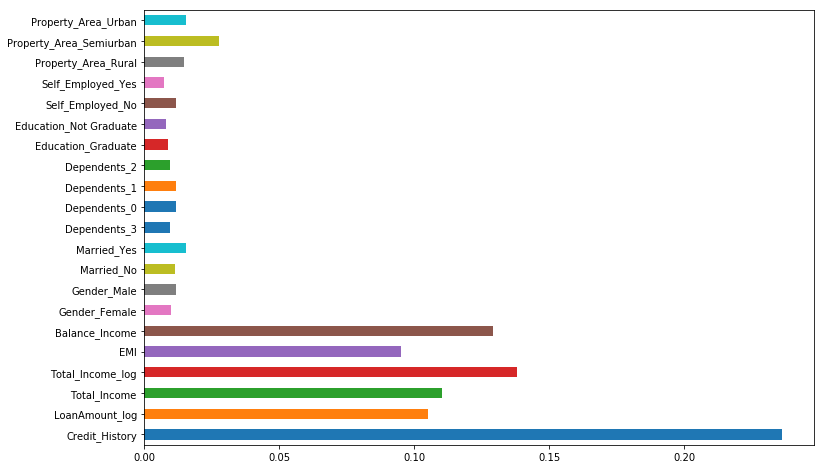

In [55]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [56]:
pred = grid_serch.predict(X_val)
metrics.accuracy_score(y_val, pred)

0.8292682926829268

## THANK YOU 